In [1]:
import pandas as pd
import numpy as np
import os
import sys
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, BatchNormalization, Bidirectional,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from IPython.display import Audio
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from torchvision.transforms import Compose
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Paths for data.
Ravdess = "/kaggle/input/ravdess/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [3]:
import os
import pandas as pd

ravdess_dir_lis = os.listdir(Ravdess)
path_list = []
emotion_list = []

# Define the dictionary of emotions
emotion_dic = {
    '03': 'happy',
    '01': 'neutral',
    '04': 'sad',
    '05': 'angry',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise',
    '02': 'calm',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(Ravdess, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            path_list.append(f"{Ravdess}/{directory}/{audio_file}")
            emotion_list.append(emotion_dic[key])

Ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['Path']),
    pd.DataFrame(emotion_list, columns=['Emotions'])
], axis=1)

Ravdess_df.head(20)


Path  Emotions
0   /kaggle/input/ravdess/audio_speech_actors_01-2...  surprise
1   /kaggle/input/ravdess/audio_speech_actors_01-2...   neutral
2   /kaggle/input/ravdess/audio_speech_actors_01-2...   disgust
3   /kaggle/input/ravdess/audio_speech_actors_01-2...   disgust
4   /kaggle/input/ravdess/audio_speech_actors_01-2...   neutral
5   /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
6   /kaggle/input/ravdess/audio_speech_actors_01-2...       sad
7   /kaggle/input/ravdess/audio_speech_actors_01-2...   neutral
8   /kaggle/input/ravdess/audio_speech_actors_01-2...      calm
9   /kaggle/input/ravdess/audio_speech_actors_01-2...     happy
10  /kaggle/input/ravdess/audio_speech_actors_01-2...   disgust
11  /kaggle/input/ravdess/audio_speech_actors_01-2...     angry
12  /kaggle/input/ravdess/audio_speech_actors_01-2...     happy
13  /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
14  /kaggle/input/ravdess/audio_speech_actors_01-2...  surprise
15  /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
16  /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
17  /kaggle/input/ravdess/audio_speech_actors_01-2...      calm
18  /kaggle/input/ravdess/audio_speech_actors_01-2...       sad
19  /kaggle/input/ravdess/audio_speech_actors_01-2...     happy

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([path_df,emotion_df], axis=1)
Crema_df.head()

Path Emotions
0  /kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav  disgust
1  /kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav    happy
2  /kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav    happy
3  /kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav  disgust
4  /kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav  disgust

In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([path_df,emotion_df], axis=1)
Tess_df.head()

Path Emotions
0  /kaggle/input/toronto-emotional-speech-set-tes...     fear
1  /kaggle/input/toronto-emotional-speech-set-tes...     fear
2  /kaggle/input/toronto-emotional-speech-set-tes...     fear
3  /kaggle/input/toronto-emotional-speech-set-tes...     fear
4  /kaggle/input/toronto-emotional-speech-set-tes...     fear

In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([path_df,emotion_df], axis=1)
Savee_df.head()

Path Emotions
0  /kaggle/input/surrey-audiovisual-expressed-emo...    happy
1  /kaggle/input/surrey-audiovisual-expressed-emo...     fear
2  /kaggle/input/surrey-audiovisual-expressed-emo...    happy
3  /kaggle/input/surrey-audiovisual-expressed-emo...  disgust
4  /kaggle/input/surrey-audiovisual-expressed-emo...    angry

In [7]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(20)

Path  Emotions
0   /kaggle/input/ravdess/audio_speech_actors_01-2...  surprise
1   /kaggle/input/ravdess/audio_speech_actors_01-2...   neutral
2   /kaggle/input/ravdess/audio_speech_actors_01-2...   disgust
3   /kaggle/input/ravdess/audio_speech_actors_01-2...   disgust
4   /kaggle/input/ravdess/audio_speech_actors_01-2...   neutral
5   /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
6   /kaggle/input/ravdess/audio_speech_actors_01-2...       sad
7   /kaggle/input/ravdess/audio_speech_actors_01-2...   neutral
8   /kaggle/input/ravdess/audio_speech_actors_01-2...      calm
9   /kaggle/input/ravdess/audio_speech_actors_01-2...     happy
10  /kaggle/input/ravdess/audio_speech_actors_01-2...   disgust
11  /kaggle/input/ravdess/audio_speech_actors_01-2...     angry
12  /kaggle/input/ravdess/audio_speech_actors_01-2...     happy
13  /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
14  /kaggle/input/ravdess/audio_speech_actors_01-2...  surprise
15  /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
16  /kaggle/input/ravdess/audio_speech_actors_01-2...      fear
17  /kaggle/input/ravdess/audio_speech_actors_01-2...      calm
18  /kaggle/input/ravdess/audio_speech_actors_01-2...       sad
19  /kaggle/input/ravdess/audio_speech_actors_01-2...     happy

Emotion Distribution Table:
    Emotion  Count
0      fear   1923
1   disgust   1923
2     happy   1923
3       sad   1923
4     angry   1923
5   neutral   1703
6  surprise    652
7      calm    192


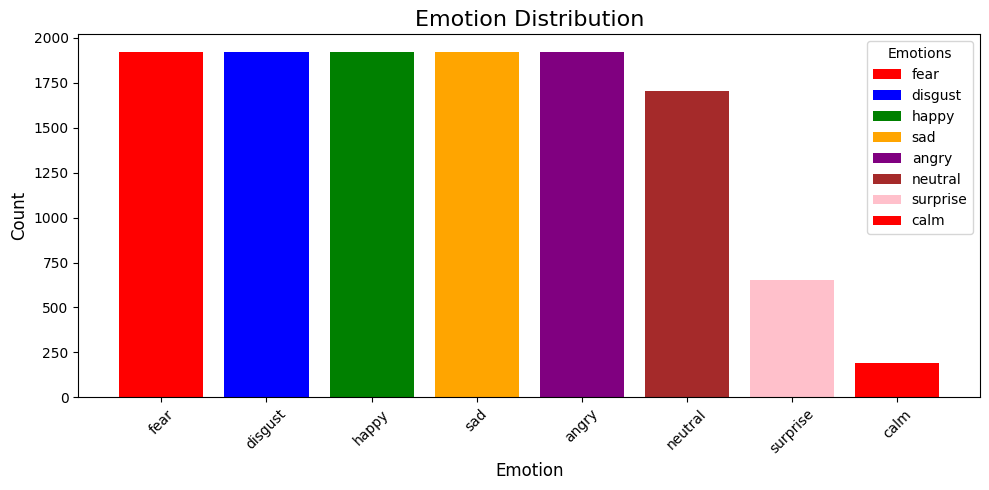

In [8]:
def plot_distribution_and_table(df):
    # Count the occurrences of each emotion
    emotion_counts = df['Emotions'].value_counts()
    
    # Display the counts as a table
    emotion_table = pd.DataFrame({'Emotion': emotion_counts.index, 'Count': emotion_counts.values})
    print("Emotion Distribution Table:")
    print(emotion_table)
    
    # Define custom colors for the bars
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
    
    # Plot the distribution as a bar chart with custom colors
    plt.figure(figsize=(10, 5))
    bars = plt.bar(emotion_counts.index, emotion_counts.values, color=colors)
    plt.title('Emotion Distribution', fontsize=16)
    plt.xlabel('Emotion', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    
    # Add legend for the colors
    plt.legend(bars, emotion_counts.index, title="Emotions", loc="upper right", fontsize=10)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Assuming data_path is your DataFrame containing the 'emotion' column
plot_distribution_and_table(data_path)

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

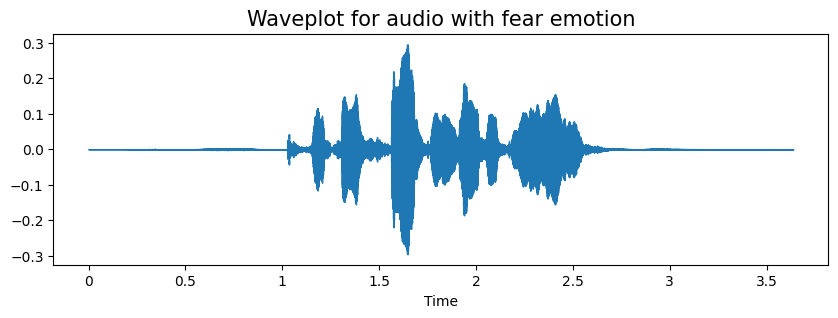

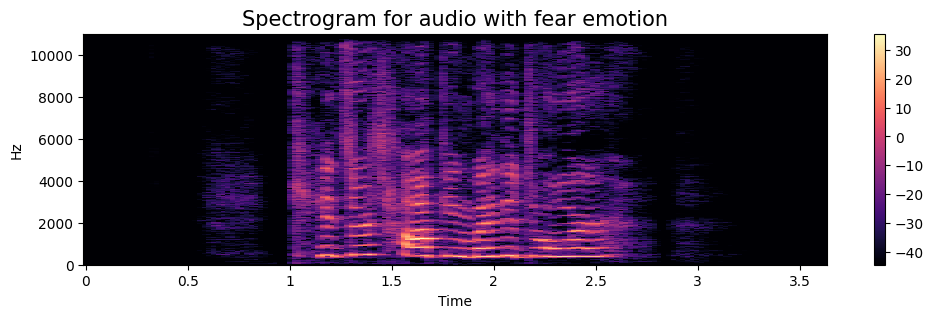

In [10]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

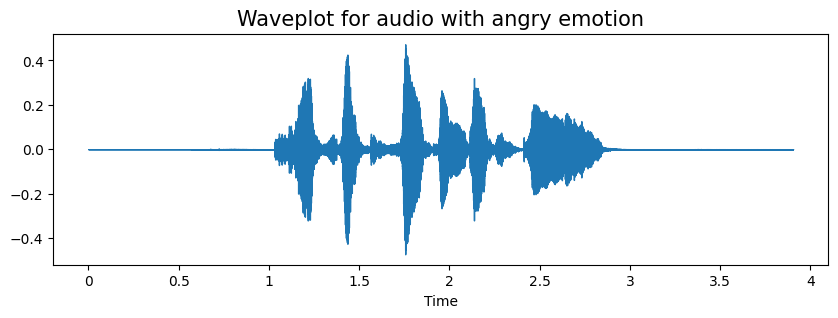

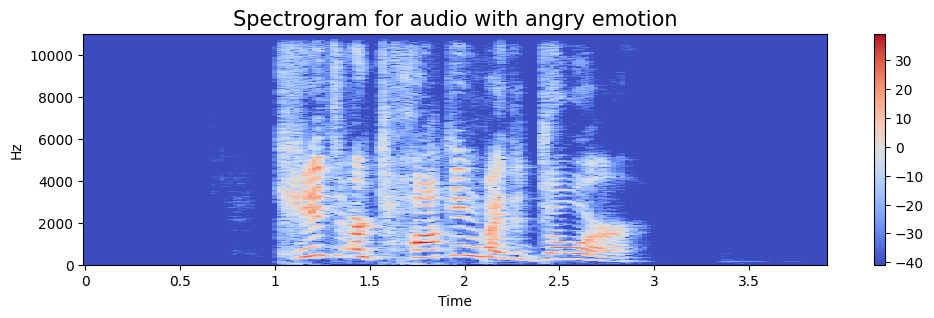

In [11]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

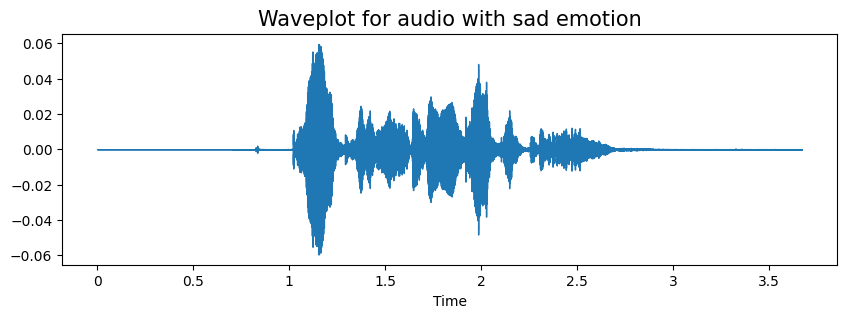

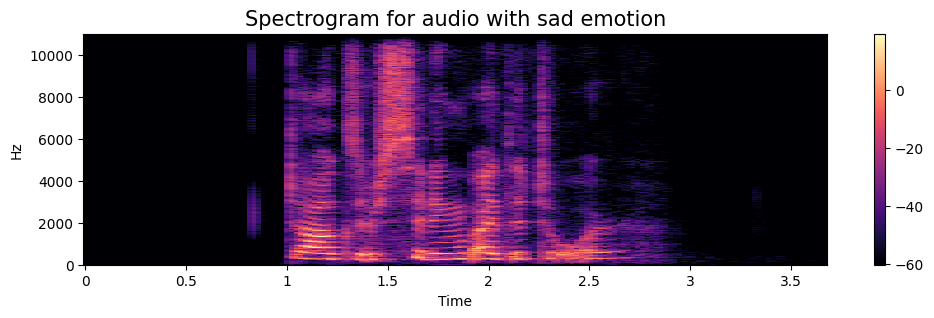

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

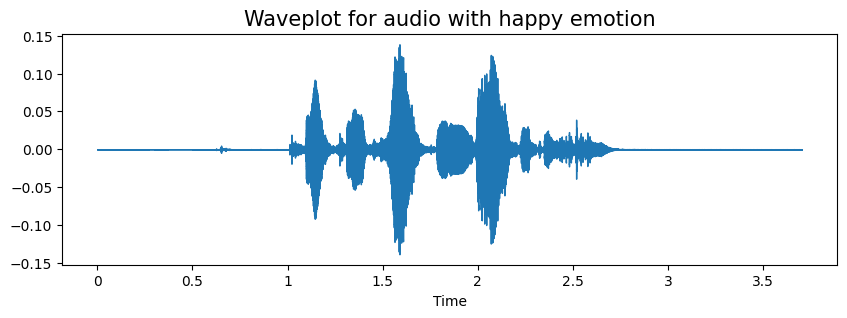

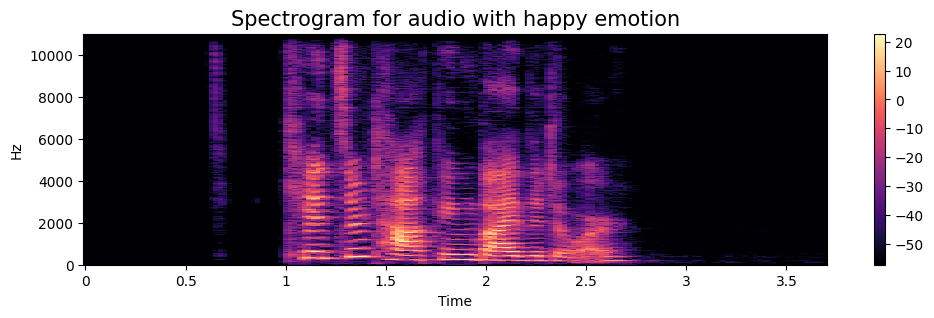

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    ste = librosa.effects.time_stretch(data,rate=0.8)
    return ste

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)


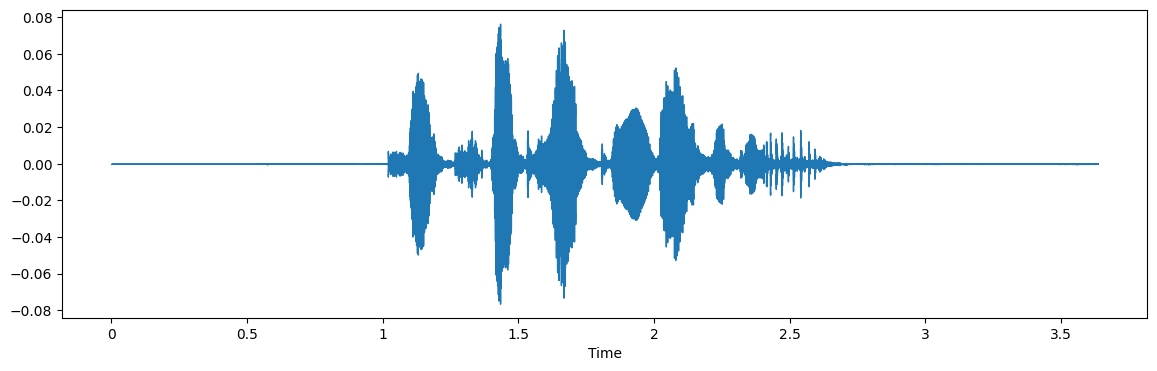

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

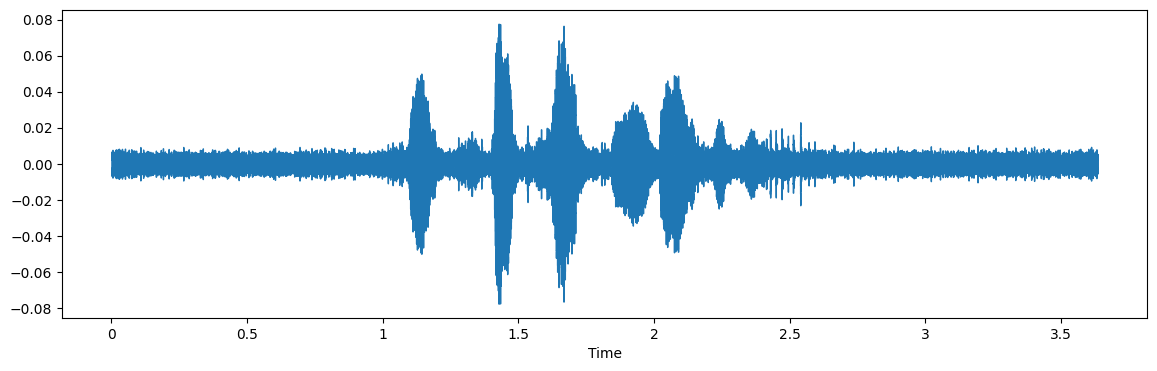

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

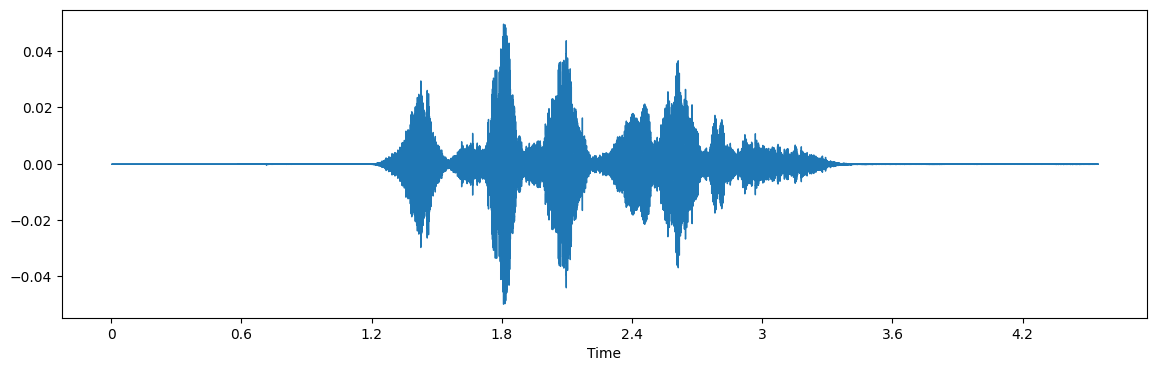

In [17]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

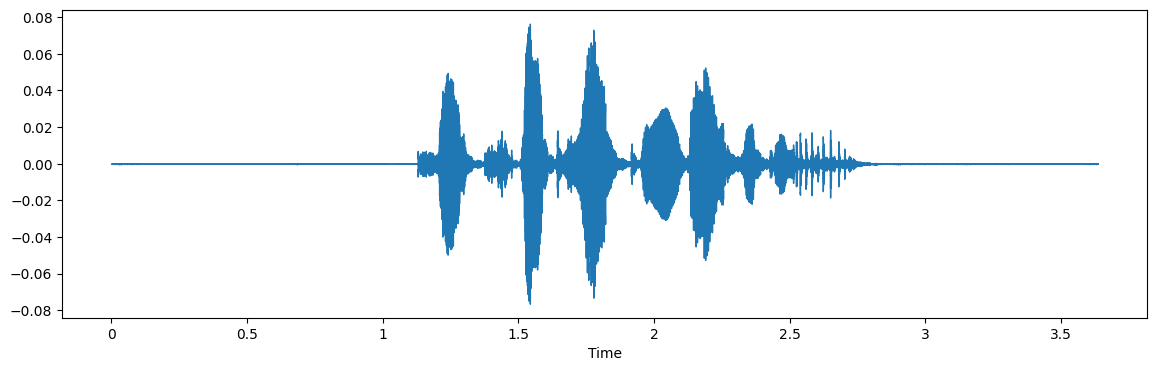

In [18]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

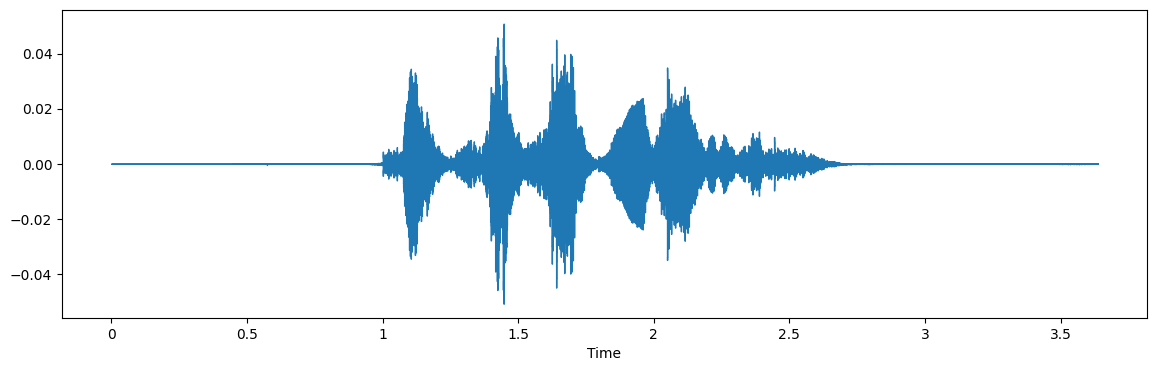

In [19]:
x = pitch(data, sample_rate) # Make sure sample_rate is defined
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [20]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result


In [21]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # Append the emotion multiple times for augmented data
        Y.append(emotion)

In [23]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [24]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.237382  0.682273  0.670519  0.614793  0.579039  0.566803  0.637206   
1  0.326859  0.723751  0.729368  0.719004  0.717905  0.728725  0.731762   
2  0.185699  0.701609  0.669991  0.646497  0.569470  0.522184  0.620172   
3  0.256113  0.621621  0.580278  0.598515  0.628296  0.598014  0.597272   
4  0.315538  0.684994  0.687058  0.720084  0.751700  0.731819  0.664640   

          7         8         9  ...       153       154       155       156  \
0  0.667451  0.663883  0.669903  ...  0.000234  0.000235  0.000138  0.000128   
1  0.707351  0.697761  0.699665  ...  0.001196  0.001196  0.001080  0.001109   
2  0.694164  0.706134  0.679070  ...  0.000047  0.000049  0.000054  0.000048   
3  0.650352  0.698635  0.681863  ...  0.000018  0.000016  0.000013  0.000012   
4  0.682171  0.723680  0.724472  ...  0.000168  0.000166  0.000162  0.000169   

        157       158       159       160           161    labels  
0  0.000299  0.000360  0.000275  0.000173  2.896729e-05  surprise  
1  0.001284  0.001337  0.001240  0.001133  9.531488e-04  surprise  
2  0.000024  0.000053  0.000074  0.000031  2.444069e-06  surprise  
3  0.000007  0.000008  0.000008  0.000005  5.802854e-07   neutral  
4  0.000161  0.000157  0.000163  0.000151  1.445342e-04   neutral  

[5 rows x 163 columns]

In [25]:
X = np.array(X)
Y = np.array(Y)

# Map emotions to integers
unique_emotions = sorted(np.unique(Y))
label_to_index = {emotion: idx for idx, emotion in enumerate(unique_emotions)}
Y = np.array([label_to_index[emotion] for emotion in Y])

In [26]:
# Split data into training, validation, and test sets
X_train, X_to_split, y_train, y_to_split = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.5, random_state=1)

In [27]:
print(X_train.shape)
print(X_val.shape)

(29188, 162)
(3649, 162)


In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29188, 162), (29188,), (3649, 162), (3649,))

In [29]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29188, 162, 1), (29188,), (3649, 162, 1), (3649,))

In [30]:
# Ensure labels are 1D before one-hot encoding
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)
y_test = np.squeeze(y_test)

# One-hot encode the labels
y_train_class = to_categorical(y_train, num_classes=8)  # Adjust for 7 classes
y_val_class = to_categorical(y_val, num_classes=8)
y_test_class = to_categorical(y_test, num_classes=8)

# Check shapes of inputs and labels
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train_class shape: {y_train_class.shape}")
print(f"y_val_class shape: {y_val_class.shape}")
print(f"y_test_class shape: {y_test_class.shape}")


X_train shape: (29188, 162)
X_val shape: (3649, 162)
y_train_class shape: (29188, 8)
y_val_class shape: (3649, 8)
y_test_class shape: (3649, 8)


In [31]:
print("y_train shape before one-hot encoding:", y_train.shape)
print("y_val shape before one-hot encoding:", y_val.shape)
print("y_train_class shape after one-hot encoding:", y_train_class.shape)  # Should be (num_samples, 8)
print("y_val_class shape after one-hot encoding:", y_val_class.shape) 

y_train shape before one-hot encoding: (29188,)
y_val shape before one-hot encoding: (3649,)
y_train_class shape after one-hot encoding: (29188, 8)
y_val_class shape after one-hot encoding: (3649, 8)


In [32]:
print("y shape:", Y.shape)
print("Sample values in y:", Y[:10])
print("X shape:", X.shape)  # Features
print("y shape:", Y.shape)  # Labels
print("Unique labels in y:", np.unique(Y))  # Should be integers like [0, 1, ..., num_classes-1]
print("Number of emotions:", len(emotion))

y shape: (36486,)
Sample values in y: [7 7 7 5 5 5 2 2 2 2]
X shape: (36486, 162)
y shape: (36486,)
Unique labels in y: [0 1 2 3 4 5 6 7]
Number of emotions: 5


In [33]:
print("X_train shape:", x_train.shape)  # Should be (num_samples, timesteps, features)
print("y_train_class shape:", y_train_class.shape)  # Should be (num_samples, 8)

X_train shape: (29188, 162, 1)
y_train_class shape: (29188, 8)


In [36]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, Dropout, GRU,
    Bidirectional, Dense, Flatten, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Define the updated GRU model
model_gru = Sequential()

# First Conv1D Block
model_gru.add(Conv1D(512, kernel_size=7, strides=2, padding='same', activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model_gru.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.4))  # Slightly increased dropout

# Second Conv1D Block
model_gru.add(Conv1D(256, kernel_size=5, strides=1, padding='same'))
model_gru.add(LeakyReLU(alpha=0.1))  # Use LeakyReLU for smoother gradient flow
model_gru.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.4))  # Increased dropout

# Third Conv1D Block
model_gru.add(Conv1D(256, kernel_size=3, strides=1, padding='same'))
model_gru.add(LeakyReLU(alpha=0.1))
model_gru.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.4))

# Bidirectional GRU Block
model_gru.add(Bidirectional(GRU(128, return_sequences=True, kernel_regularizer=l2(0.001))))  # Increased GRU units
model_gru.add(Dropout(0.4))

# Final GRU Layer
model_gru.add(GRU(64, return_sequences=False, kernel_regularizer=l2(0.001)))  # Further regularization
model_gru.add(Dropout(0.5))  # Increased dropout

# Dense Layers
model_gru.add(Dense(128, activation='relu', kernel_regularizer=l2(0.005)))  # Increased units and L2 strength
model_gru.add(Dropout(0.4))
model_gru.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model_gru.add(Dropout(0.4))
model_gru.add(Dense(8, activation='softmax'))  # Output layer for 8 classes

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.0005)  # Adaptive learning rate
model_gru.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Summary
model_gru.summary()

# Callbacks: Learning Rate Reduction and Model Checkpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=35, min_lr=1e-6, verbose=1)

model_checkpoint = ModelCheckpoint(
    '/kaggle/working/best_model.keras',  # Save the model in /kaggle/working
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # Look for the maximum validation accuracy
    verbose=1
)

# Train the model
history_gru = model_gru.fit(
    x_train, y_train_class,
    batch_size=64,
    epochs=500,  # Extended epochs
    validation_data=(x_test, y_test_class),
    callbacks=[reduce_lr, model_checkpoint]  # Include ModelCheckpoint callback
)

# Load the best model
from tensorflow.keras.models import load_model
best_model = load_model('/kaggle/working/best_model.keras')

# Export the model
best_model.save("/kaggle/working/exported_best_model.keras")
print("Best model saved and exported as '/kaggle/working/exported_best_model.keras'")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 81, 512)        │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 41, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 41, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 41, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 41, 256)        │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 21, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 11, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        61,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,236,040 (4.72 MB)

 Trainable params: 1,233,992 (4.71 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/500
457/457 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2054 - loss: 3.2283
Epoch 1: val_accuracy improved from -inf to 0.16004, saving model to /kaggle/working/best_model.keras
457/457 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.2055 - loss: 3.2275 - val_accuracy: 0.1600 - val_loss: 3.0338 - learning_rate: 5.0000e-04
Epoch 2/500
456/457 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2802 - loss: 2.2562
Epoch 2: val_accuracy improved from 0.16004 to 0.34968, saving model to /kaggle/working/best_model.keras
457/457 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.2803 - loss: 2.2557 - val_accuracy: 0.3497 - val_loss: 1.8544 - learning_rate: 5.0000e-04
Epoch 3/500
456/457 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3231 - loss: 1.8745
Epoch 3: val_accuracy improved from 0.34968 to 0.36859, saving model to /kaggle/working/best_model.keras
457/457 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3231 - loss: 1.8742 - val_accuracy: 0.3686 - val_loss: 1.6546 - learning_ra

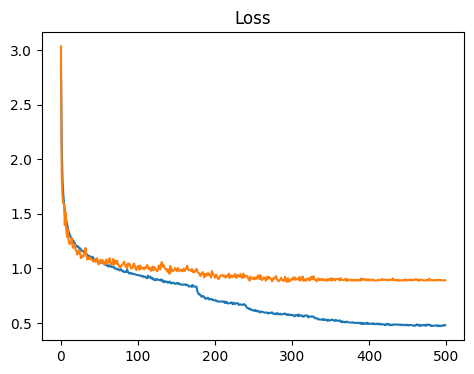

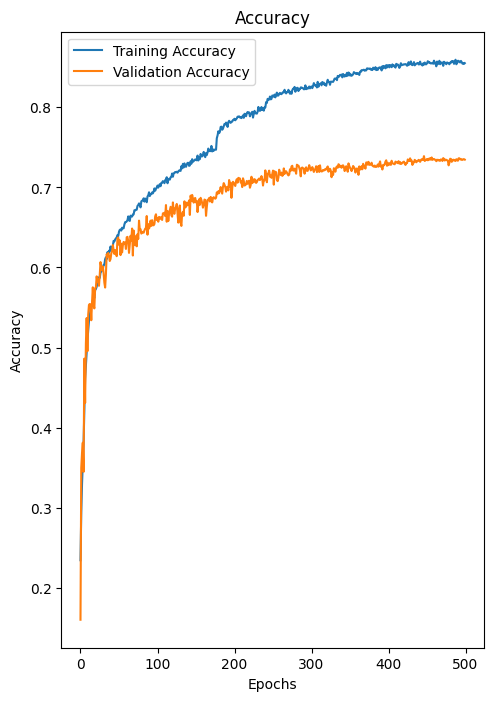

In [37]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.figure(figsize=(12,8))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot the training process
plot_training_history(history_gru)

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test Accuracy: 0.7394
Test Precision: 0.7430
Test Recall: 0.7394
Test F1-score: 0.7389


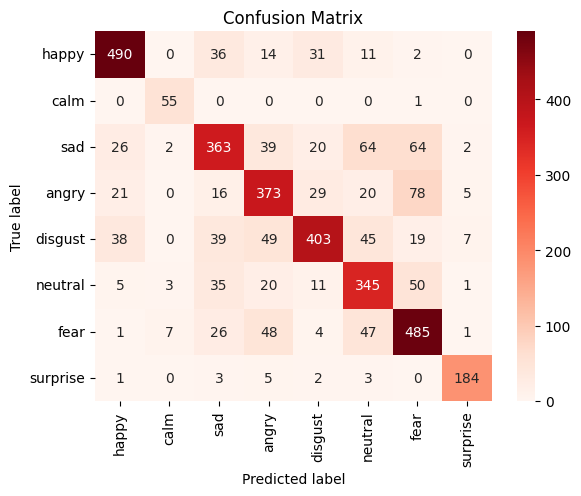

In [39]:
# Load the best saved model
best_model = load_model('/kaggle/input/hi/keras/default/1/best_model (1).keras')

# Predict on the test set
y_pred = np.argmax(best_model.predict(x_test), axis=1)

# Define labels for the confusion matrix
labels = ['happy', 'calm', 'sad', 'angry', 'disgust', 'neutral', 'fear', 'surprise']

# Calculate the confusion matrix
cm = confusion_matrix(
    np.argmax(y_test_class, axis=1),
    y_pred,
    labels=range(len(labels))  # Ensure the range matches the number of labels
)

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()